<a href="https://colab.research.google.com/github/samiha-mahin/A-Machine-Learning-Models-Repo/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 🌳 What is a Decision Tree?

A **Decision Tree** is a supervised machine learning algorithm used for **classification** and **regression**.

It splits the data into smaller parts based on **questions/conditions** to make a decision.

---

### 🎯 Goal:

Find the best **features** to split data so the resulting groups are as **pure** as possible.

---

## 🧪 Example Dataset:

| Weather  | Temp | Play? |
| -------- | ---- | ----- |
| Sunny    | Hot  | No    |
| Sunny    | Hot  | No    |
| Overcast | Hot  | Yes   |
| Rainy    | Mild | Yes   |
| Rainy    | Cool | Yes   |
| Rainy    | Cool | No    |
| Overcast | Cool | Yes   |
| Sunny    | Mild | No    |

Let’s say we want to predict whether someone will **Play** or **Not Play** based on **Weather**.

---

## 🔍 How It Decides the Best Split

It uses either:

### 1. **Entropy (Information Gain)**

* Measures **impurity or randomness** in data.
* Formula:

  $$
  \text{Entropy} = -p_1 \log_2(p_1) - p_2 \log_2(p_2)
  $$

  where $p_1$, $p_2$ are class probabilities (Yes/No).

✅ Lower entropy = purer data

---

### 2. **Gini Impurity**

* Also measures how **impure** a node is.
* Formula:

  $$
  \text{Gini} = 1 - \sum p_i^2
  $$

✅ Gini is often faster than entropy and gives similar results.

---

## 🌳 Tree Building Example

**Root Node → Split on Weather**

* **Sunny** → Mostly No
* **Overcast** → Always Yes
* **Rainy** → Mixed

→ So it chooses **Weather** as the first split.

```text
          [Weather]
         /    |     \
    Sunny  Overcast Rainy
     No       Yes     ?
```

Now it keeps splitting the remaining branches (e.g., Rainy → check Temp).

---

## ✅ Summary Table

| Concept       | Meaning                             |
| ------------- | ----------------------------------- |
| Decision Tree | Tree-like model for decision making |
| Entropy       | Info gain to reduce randomness      |
| Gini Impurity | Measures purity of split            |
| Leaf Node     | Final output (Yes/No)               |
| Internal Node | Feature-based decision              |





# **Churn Modelling with Decision Tree**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

## Encoding categorical variables

In [15]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [18]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [20]:
ohe_geography = OneHotEncoder(drop='first')
geo_encoded = ohe_geography.fit_transform(df[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe_geography.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [22]:
data = pd.concat([df.drop(columns=['Geography']), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [30]:
data.shape

(10000, 12)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


## Necessary EDA (basic descriptive statistics)

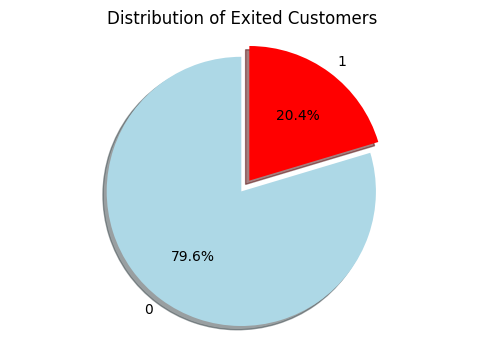

In [32]:
exited_counts = data['Exited'].value_counts()

plt.figure(figsize=(6, 4))

plt.pie(exited_counts,
        labels=exited_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'red'],
        explode = (0, 0.1),
        shadow=True)

plt.title('Distribution of Exited Customers')
plt.axis('equal')
plt.show()

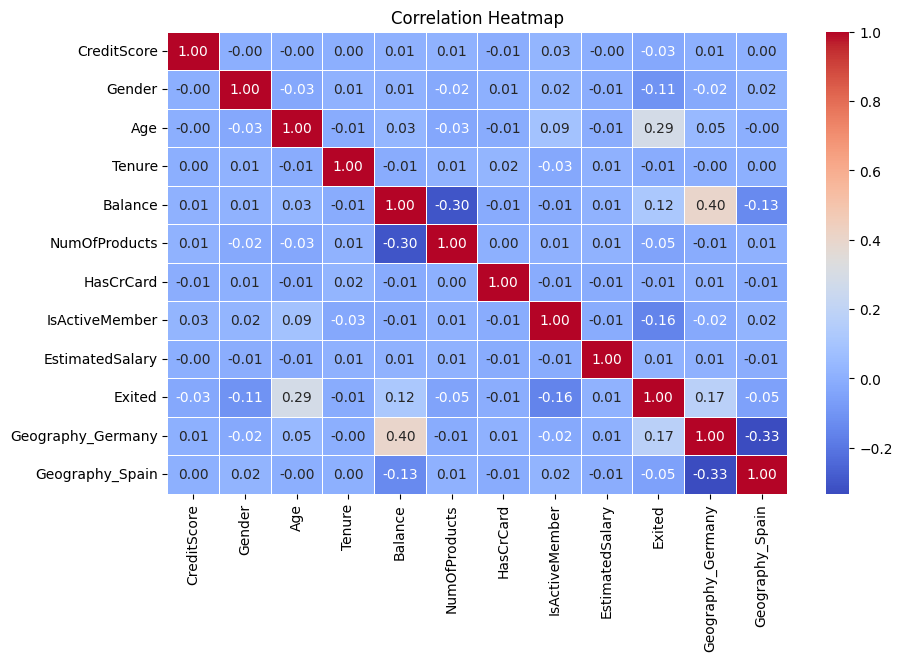

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
# Use the 'data' DataFrame which contains the one-hot encoded 'Geography' columns
correlation_matrix = data.corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color theme
            fmt='.2f',           # Format the values
            linewidths=0.5)      # Line between boxes

plt.title('Correlation Heatmap')
plt.show()

In [33]:
X = data.drop(columns=['Exited'], axis=1)
y = data[['Exited']]

In [34]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0


In [35]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X_train.shape

(7000, 11)

In [38]:
X_test.shape

(3000, 11)

In [39]:
clf = DecisionTreeClassifier()

In [40]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
accuracy_score(y_test, y_pred)

0.807

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.50      0.53      0.52       584

    accuracy                           0.81      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.81      0.81      0.81      3000

